                                NAME - DIVYANAND  (18BCE0902)
                                       PARTH MEHRA (18BCE0504)


                                        REVIEW 2 
                                    IMAGE PROCESSING 

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=e206db1c45de46674c009d521f4575247b96013964e2b5fbbd6d785dd3bf734a
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
import cv2
import imutils
import pytesseract
from google.colab.patches import cv2_imshow

In [ ]:
!pip install pytesseract

In [70]:
from google.colab import files

uploaded=files.upload()

Saving test2.jpeg to test2 (1).jpeg


In [ ]:
from google.colab.patches import cv2_imshow

# **Read** the image and resize it

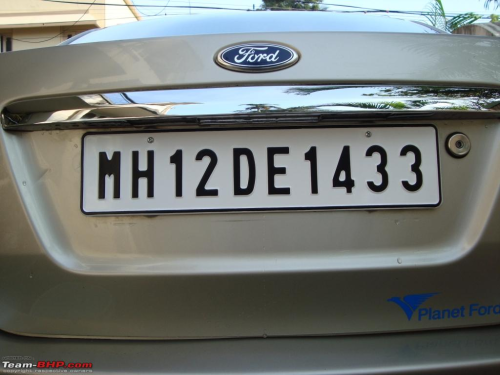

In [71]:

image = cv2.imread('test2.jpeg')
image = imutils.resize(image, width=500)
cv2_imshow(image)

# Preprocessing of **image**

# We convert the image into **Grayscale**

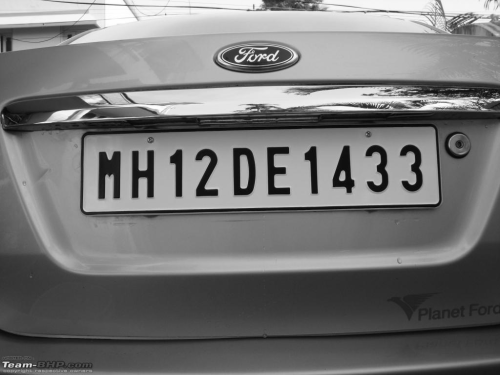

In [72]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# **Noise reduction is done so its easy to understand different parts of the image**

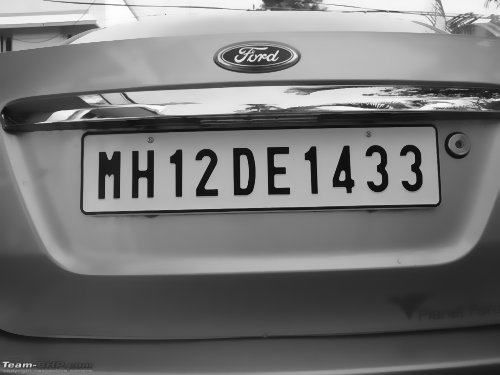

In [73]:
gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2_imshow(gray)

# **Canny edge detection is performed**

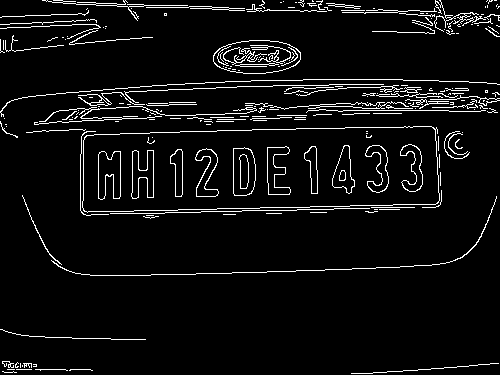

In [74]:
# perform edge detection
edged = cv2.Canny(gray, 170, 200)
cv2_imshow(edged)


# **Countour is performed to get continuous shapes**

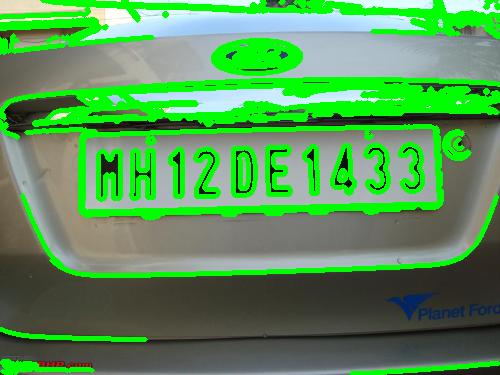

In [75]:
# find contours in the edged image
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img1=image.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
cv2_imshow(img1)

# **We have sorted first 30 countinuos countor based on area**

In [76]:
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None 

**Now we take the number plate**

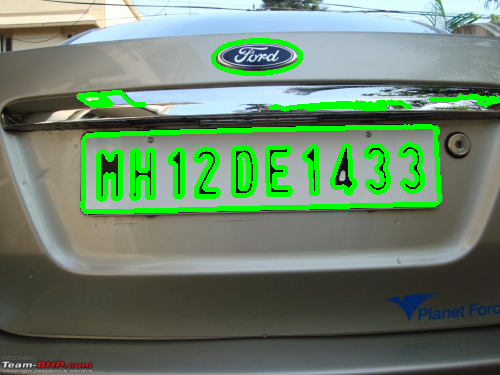

In [77]:
img2=image.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3)
cv2_imshow(img2)

In [78]:
count=0
idx=7
for c in cnts:
  peri=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c, 0.02 * peri, True)
  if(len(approx)==4):
    NumberPlateCnt=approx
    break

x,y,w,h=cv2.boundingRect(c)
new_img= image[y:y+h,x:x+w]
print(NumberPlateCnt)


[[[437 129]]

 [[ 86 135]]

 [[ 82 207]]

 [[435 204]]]


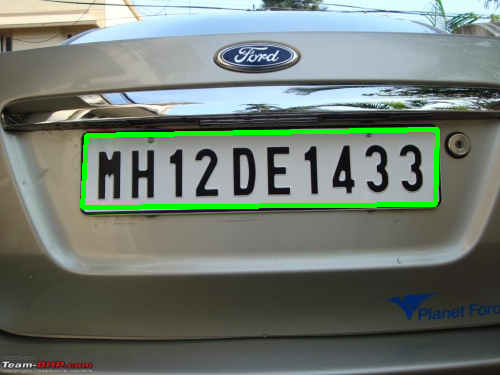

In [79]:
cv2.drawContours(image,[NumberPlateCnt],-1,(0,255,0),3)
cv2_imshow(image)

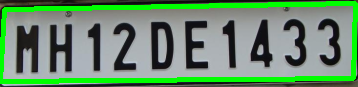

In [80]:
cv2_imshow(new_img)

In [57]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [81]:
text=pytesseract.image_to_string(new_img,lang='eng')
print("Number is:",text)

Number is: a. a |

MH12DE1433

